In [34]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load dataset from absolute path
df = pd.read_csv("/content/my_file.csv")
#load the first 5 columns
df.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [8]:
#Getting the shape of dataframe
df.shape

(36992, 24)

In [9]:
# Loading all columns that exist in our dataframe
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [10]:
#Data types in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [11]:
#Distribution of values in the dataframe
df.describe()

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,18495.500000,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,10678.814916,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,0.000000,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,9247.750000,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,18495.500000,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,27743.250000,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,36991.000000,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


### Step 2: Clean Column Names

Standardize the column names by converting them to lowercase and replacing spaces with underscores.


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Calculating percentages of null values on each column. This is to determine the best approach of dealing with the missing values

In [13]:
# Calculate null values per column as a percentage
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of null values per column:")
print(null_percentage)

Percentage of null values per column:
unnamed:_0                       0.000000
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000

This chart shows how customers are spread across different churn risk scores (0 = low risk, 1 = high risk). This helps us see if churn is a big concern.


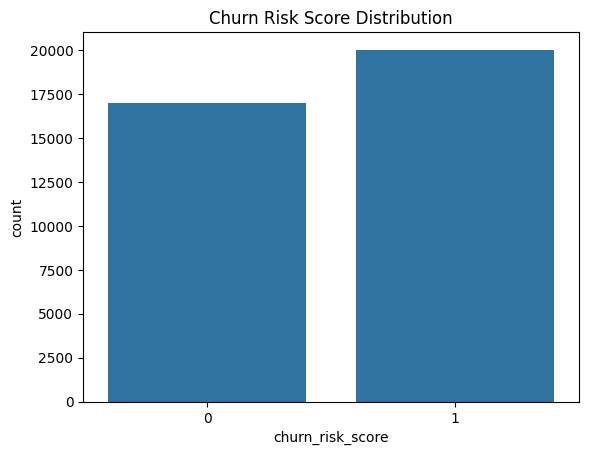

In [14]:
# Target distribution
sns.countplot(x='churn_risk_score', data=df)
plt.title("Churn Risk Score Distribution")
plt.show()

This heatmap shows how numerical features relate to each other. We can use it to see which features (like `tenure_days` or `feedback_sentiment`) are most connected to `churn_risk_score` when picking model inputs.

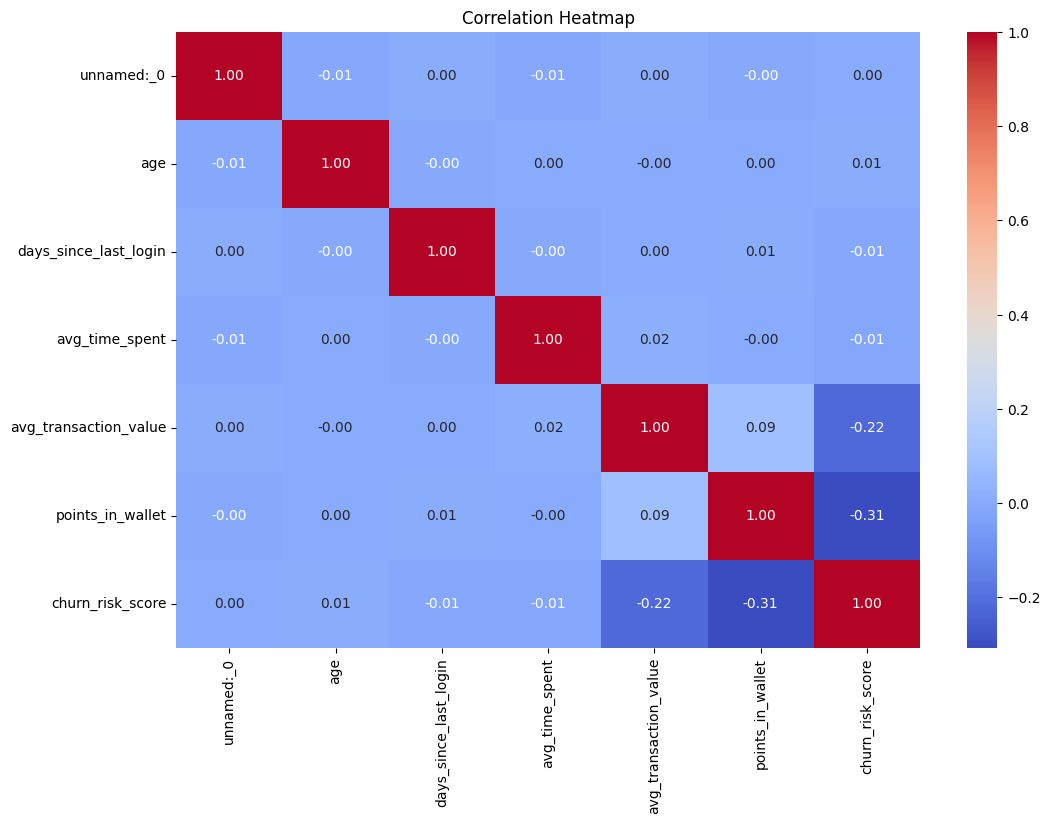

In [15]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We observe that there is no strong correlation between the numerical variables

This plot shows how customer wallet points are spread out. It helps us understand if most customers have low, average, or high points.It is useful for identifying outliers or patterns that may affect churn.

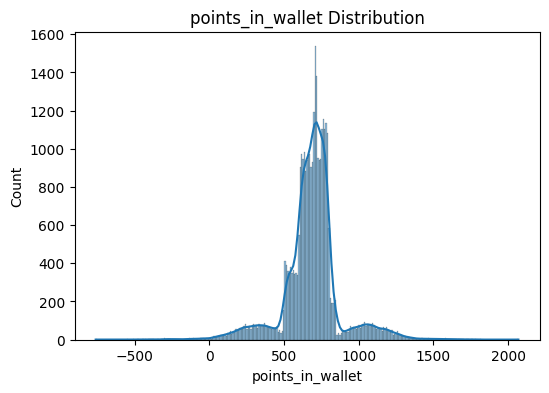

In [16]:
# Numerical distributions
for col in ['points_in_wallet']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

From the above graph, we can see that the distribution is uniform

The below graph shows membership category against churn risk score.

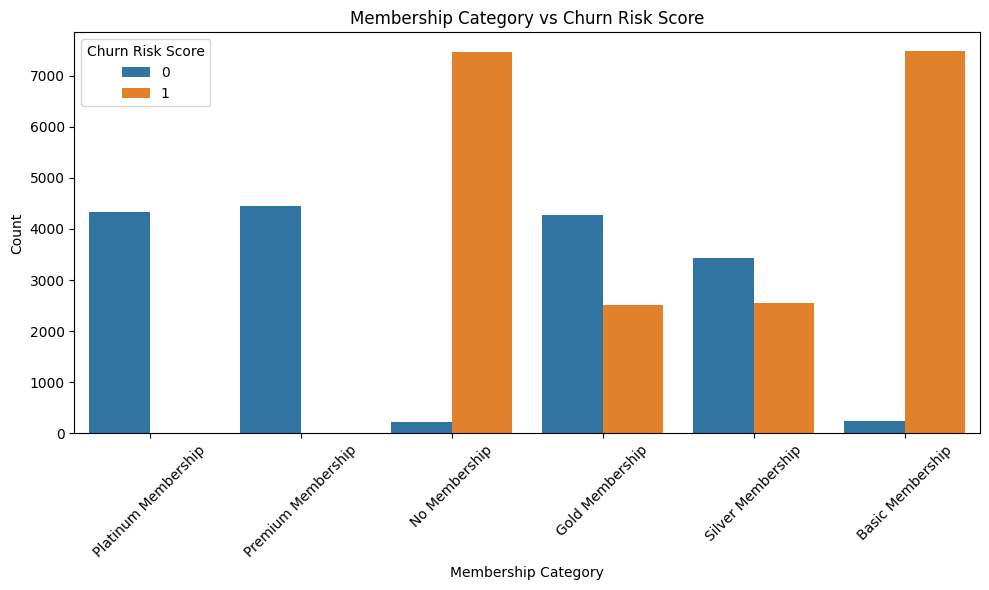

In [17]:
# Plot count of membership category vs churn risk score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score')

# Visuals
plt.title("Membership Category vs Churn Risk Score")
plt.xlabel("Membership Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn Risk Score")
plt.tight_layout()
plt.show()

From the above graph we can see that people with basic membership have a high chance of leaving and as the category of membership grows the chance of churn reduces

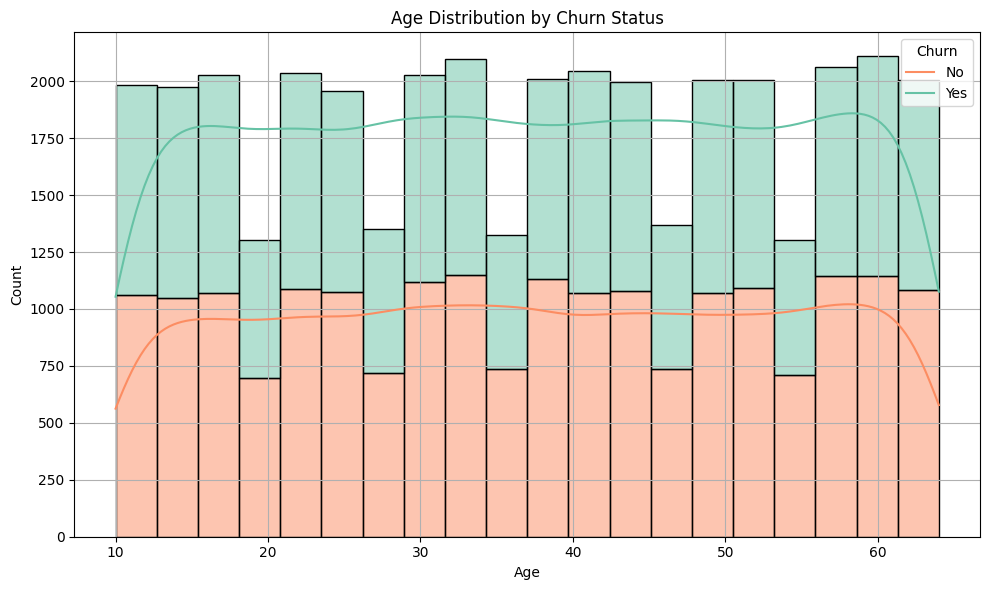

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='churn_risk_score', bins=20, kde=True, palette='Set2', multiple='stack')

plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()

The age distribution chart shows that customer churn is fairly uniform across all age groups, with no particular age range standing out as having significantly higher or lower churn rates. Both churned and non-churned customers are distributed evenly across the age spectrum, as indicated by the consistent height of the stacked bars and the overlapping KDE lines. This suggests that age is not a strong predictor of churn in this dataset, and other factors such as tenure, usage, or region may offermore meaningful insights into customer churn behavior.

#### Dropping unnecessary columns

We decided to drop the security number and ID columns since they did not offer any useful insightinto our analysis

In [19]:
df.drop(columns=['security_no'], inplace=True)
print(df.columns)

Index(['unnamed:_0', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')


#### Removing null values

Starting with preferred_offer_types column we shall proceed to remove the null values. Since the percentage of null values in this column is 0.77% which is almost negligible, we will drop all the null rows.

In [20]:
# Drop rows where 'preferred_offer_types' is null
df_cleaned = df.dropna(subset=['preferred_offer_types'])

In [21]:
# Find the most frequent value (mode) of 'region_category'
mode_region = df_cleaned['region_category'].mode()[0]
print(f"The most frequent (mode) value in 'region_category' is: {mode_region}")

The most frequent (mode) value in 'region_category' is: Town


In [22]:
# Get distribution of 'region_category'
region_distribution = df_cleaned['region_category'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'region_category':")
print(region_distribution)

Distribution of values in 'region_category':
region_category
Town       14025
City       12635
NaN         5379
Village     4665
Name: count, dtype: int64


In [23]:
# Drop rows where 'region_category' is null
df_cleaned = df_cleaned.dropna(subset=['region_category'])

In [24]:
# Display the result
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

unnamed:_0                      0.000000
age                             0.000000
gender                          0.000000
region_category                 0.000000
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.000000
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                9.423783
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64


In [25]:
# Get distribution of 'region_category'
points_in_wallet_distribution = df_cleaned['points_in_wallet'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'points_in_wallet':")
print(points_in_wallet_distribution)

Distribution of values in 'points_in_wallet':
points_in_wallet
NaN           2952
705.070000       9
771.750000       7
715.420000       6
760.580000       6
              ... 
678.090000       1
375.237620       1
330.077872       1
594.140000       1
747.940000       1
Name: count, Length: 20978, dtype: int64


In [26]:
# Fill missing values
df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)


<ipython-input-26-9a3d43490aee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)


In [27]:
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

unnamed:_0                      0.0
age                             0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
referral_id                     0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
churn_risk_score                0.0
dtype: float64


In [28]:
df_cleaned.shape

(31325, 23)

In [29]:
df_cleaned.head()

,unnamed:_0,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,698.48,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


We've observed that the dataset contains many hidden missing values represented by placeholder terms. To accurately identify and address them, we plan to carefully inspect each column individually.

In [30]:
# Inspecting the membership_categoty column
df_cleaned['membership_category'].value_counts()

,count
membership_category,
Basic Membership,6516
No Membership,6493
Gold Membership,5743
Silver Membership,5107
Premium Membership,3779
Platinum Membership,3687


For this column, the values appear valid and present; there are no hidden missing values detected.



In [35]:
# Inspecting the joining_date column. For this, we shall start by converting the column to datetime fomart.

df_cleaned['joining_date'] = pd.to_datetime(df_cleaned['joining_date'], errors = 'coerce')

To facilitate the analysis of seasonal and monthly churning patterns, we will extract the month and year from this column into separate fields.


In [40]:
# Feature engineering a column for month and year
df_cleaned['joining_year'] = df_cleaned['joining_date'].dt.year
df_cleaned['joining_month'] = df_cleaned['joining_date'].dt.month

In [47]:
# Inspecting the joined through referral column
df_cleaned['joined_through_referral'].value_counts()

,count
joined_through_referral,
No,13455
Yes,13266
?,4604


We have identified several entries where the value is missing and represented as '?'. Since this is a boolean field, it is difficult to confidently classify these as either 'Yes' or 'No'. Therefore, we will replace these unknown values with 'Not_recorded' to maintain clarity without making inaccurate assumptions or losing data in dropping them.

In [48]:
# Replacing '?' with 'Not_recorded'
df_cleaned['joined_through_referral'] = df_cleaned['joined_through_referral'].replace('?','Not_recorded')